In [8]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

conso = pd.read_csv('conso_train.csv', sep=';')
meteo = pd.read_csv('meteo_train.csv', sep=';', usecols=['Date UTC', 'T¬∞ (C)', 'P (hPa)', 'HR (%)', 'P.ros√©e (¬∞C)', 'Visi (km)', 'Vt. moy. (km/h)','Vt. raf. (km/h)', 'Vt. dir (¬∞)','RR 3h (mm)','Neige (cm)','Nebul. (octats)'])

display(conso.head())
display(meteo.head())

,date,puissance
0,2015-09-13T00:59:59+02:00,526.166667
1,2015-09-13T01:59:59+02:00,495.000000
2,2015-09-13T02:59:59+02:00,446.166667
3,2015-09-13T03:59:59+02:00,365.833333
4,2015-09-13T04:59:59+02:00,341.000000


,Date UTC,T¬∞ (C),P (hPa),HR (%),P.ros√©e (¬∞C),Visi (km),Vt. moy. (km/h),Vt. raf. (km/h),Vt. dir (¬∞),RR 3h (mm),Neige (cm),Nebul. (octats)
0,13/09/15 00h00,12.5,1008.7,81.0,9.3,40.0,9.260,18.520,140.0,0.0,NaN,8.0
1,13/09/15 03h00,12.3,1006.4,83.0,9.5,40.0,11.112,16.668,120.0,0.0,NaN,8.0
2,13/09/15 06h00,12.3,1004.7,82.0,9.3,40.0,14.816,22.224,130.0,NaN,NaN,7.0
3,13/09/15 09h00,14.2,1002.9,80.0,10.8,40.0,18.520,31.484,140.0,NaN,NaN,7.0
4,13/09/15 12h00,13.3,1000.8,93.0,12.2,4.0,18.520,38.892,140.0,4.0,NaN,7.0


In [9]:
meteo.columns = ['date','temp','pression','hr','pros','visi','vmoy','vraf','vdir','rr','neige','nebul']

In [10]:
conso.date = pd.to_datetime(conso.date)
conso.index = conso.date

meteo.date = meteo.date.str.replace('h', ':')
meteo.date = pd.to_datetime(meteo.date, format='%d/%m/%y %H:%M')
meteo.date = meteo.date.dt.strftime('%Y-%m-%d %H:%M')
meteo.date = pd.to_datetime(meteo.date)
meteo.index = meteo.date

display(conso.head())
display(meteo.head())

,date,puissance
date,,
2015-09-12 22:59:59,2015-09-12 22:59:59,526.166667
2015-09-12 23:59:59,2015-09-12 23:59:59,495.000000
2015-09-13 00:59:59,2015-09-13 00:59:59,446.166667
2015-09-13 01:59:59,2015-09-13 01:59:59,365.833333
2015-09-13 02:59:59,2015-09-13 02:59:59,341.000000


,date,temp,pression,hr,pros,visi,vmoy,vraf,vdir,rr,neige,nebul
date,,,,,,,,,,,,
2015-09-13 00:00:00,2015-09-13 00:00:00,12.5,1008.7,81.0,9.3,40.0,9.260,18.520,140.0,0.0,NaN,8.0
2015-09-13 03:00:00,2015-09-13 03:00:00,12.3,1006.4,83.0,9.5,40.0,11.112,16.668,120.0,0.0,NaN,8.0
2015-09-13 06:00:00,2015-09-13 06:00:00,12.3,1004.7,82.0,9.3,40.0,14.816,22.224,130.0,NaN,NaN,7.0
2015-09-13 09:00:00,2015-09-13 09:00:00,14.2,1002.9,80.0,10.8,40.0,18.520,31.484,140.0,NaN,NaN,7.0
2015-09-13 12:00:00,2015-09-13 12:00:00,13.3,1000.8,93.0,12.2,4.0,18.520,38.892,140.0,4.0,NaN,7.0


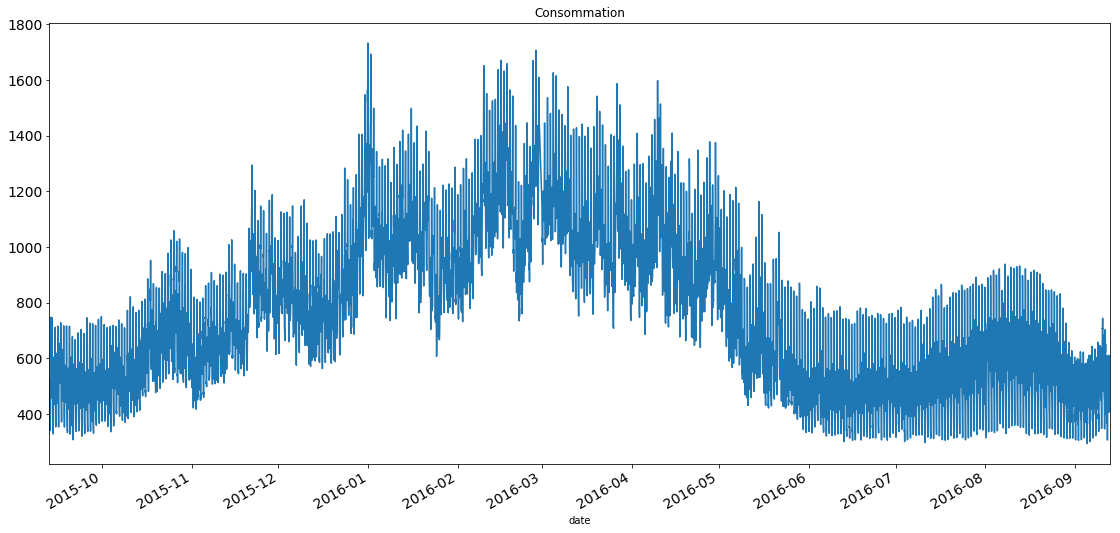

In [14]:
conso.puissance.plot(figsize=(19,9), title='Consommation', fontsize=14)
plt.show()

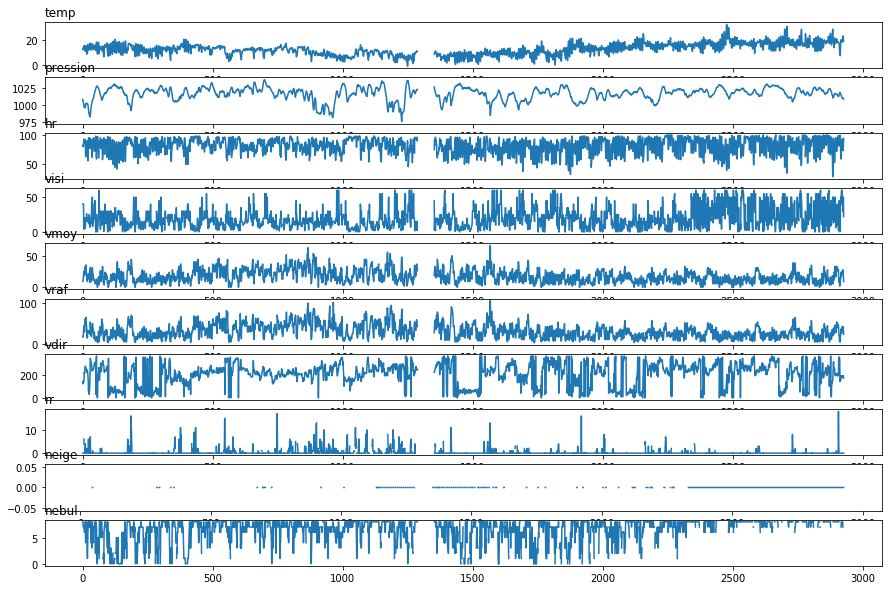

In [17]:
values = meteo.values

groups = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11]
i = 1
# plot each column
plt.figure(figsize=(15,10)) #https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(meteo.columns[group], y=1, loc='left')
	i += 1
plt.show()